In [2]:
import pickle
import matplotlib.pyplot as plt
import wfdb

In [3]:
# Load the ECG signal for patient a01
base_dir = '/home/explorer/PDC/jisulee/PhysioNet/data/'
signal, fields = wfdb.rdsamp(base_dir + 'a01', channels=[0])

In [4]:
# Load the processed R-peak positions
save_dir = '/home/explorer/PDC/jisulee/new/1. preprocessing/pkl(s)/'
with open(save_dir + 'a01.pkl', 'rb') as f:
    speaks_data = pickle.load(f)

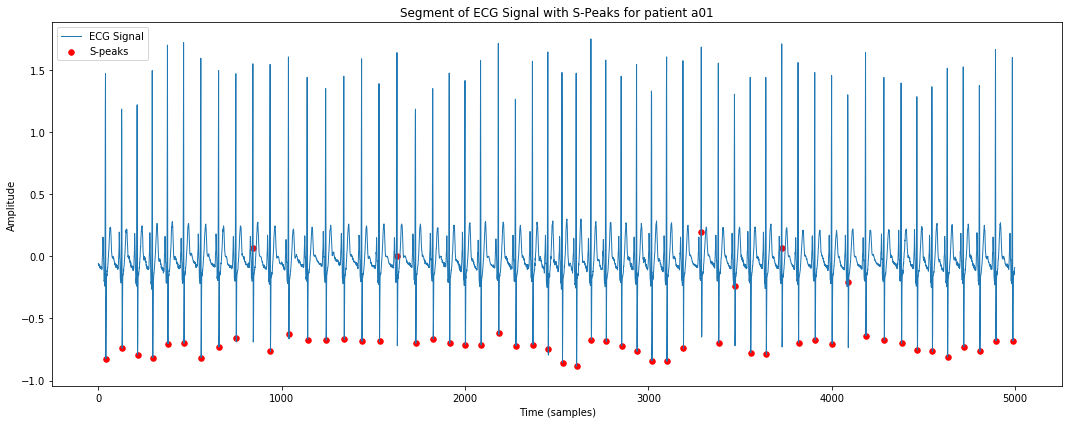

s peak 개수:  368
[41, 130, 214, 297, 380, 467, 561, 658, 752, 844, 939, 1039, 1142, 1243, 1341, 1438, 1534, 1630, 1732, 1827, 1917, 2002, 2088, 2184, 2278, 2371, 2454, 2532, 2609, 2690, 2771, 2855, 2939, 3020, 3102, 3192, 3290, 3384, 3472, 3559, 3644, 3729, 3820, 3911, 4003, 4090, 4187, 4288, 4382, 4468, 4550, 4633, 4721, 4809, 4897, 4989, 5079, 5168, 5261, 5350, 5440, 5531, 5623, 5711, 5799, 5892, 5981, 6069, 6160, 6248, 6336, 6425, 6509, 6593, 6676, 6768, 6855, 6940, 7025, 7112, 7195, 7280, 7365, 7448, 7527, 7608, 7691, 7775, 7856, 7934, 8014, 8098, 8184, 8277, 8363, 8443, 8524, 8605, 8690, 8778, 8863, 8945, 9022, 9095, 9166, 9237, 9315, 9398, 9486, 9573, 9657, 9740, 9823, 9907, 9987, 10065, 10144, 10231, 10315, 10403, 10484, 10563, 10649, 10742, 10830, 10915, 10998, 11083, 11175, 11268, 11358, 11443, 11525, 11608, 11693, 11778, 11858, 11940, 12030, 12122, 12209, 12292, 12380, 12471, 12565, 12656, 12746, 12837, 12931, 13022, 13110, 13197, 13288, 13379, 13466, 13544, 13619, 13691, 1377

In [6]:
# 시간 위치를 샘플 인덱스로 변환하는 과정
# 예) 100Hz로 샘플링 -> 1초에 100개의 샘플 생성. 신호 시작으로부터 1초 후에 발생한 이벤트는 100번재 샘플. 
ssi_data, amp_data = zip(*speaks_data[0])
amp_tm, amp_signal = zip(*amp_data)

# Convert time of R-peaks to indices
s_peak_indices = [int(tm * fields['fs']) for tm in amp_tm[0]]

# 시각화 범위 설정
start_index = 0
end_index = 5000

# Plotting
plt.figure(figsize=(15, 6))  # Increase figure size
plt.plot(signal[start_index:end_index], label='ECG Signal', linewidth=1)
plt.scatter([idx for idx in s_peak_indices if start_index <= idx < end_index],
            [signal[idx] for idx in s_peak_indices if start_index <= idx < end_index],
            color='red', s=30, label='S-peaks')  # Increase marker size

plt.title('Segment of ECG Signal with S-Peaks for patient a01')
plt.legend()
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print("s peak 개수: ", len(s_peak_indices))
print(s_peak_indices)
